In [70]:
setwd('/import/DB/zhang//data')

In [71]:
ls()

[1] "Cellratio"       "OS"              "SCE"             "allcolour"      
 [5] "cellper"         "cellper_"        "celltype"        "daa"            
 [9] "group"           "group_"          "i"               "immune.combined"
[13] "labely"          "mca2"            "my_comparisons"  "pp1"            
[17] "pplist"          "sample"          "samples"         "scRNA"          
[21] "scRNA_harmony"   "sce.markers"     "sceList"         "sce_groups"     
[25] "scedata"         "single.ob"       "top5"

In [72]:
daa = readRDS('./scRNA.rename.rds')

In [73]:
table(daa$sample)


          C1           C2           C3           C4           S1           S2 
        6409         6746         7611         7774         3644         6534 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
        2465         4752        10007         4997        10050         9475 
WH2203005877 
        7033 

In [74]:
library(Seurat)

In [75]:
DefaultAssay(daa) = 'RNA'

In [76]:
Idents(daa) = 'celltype'

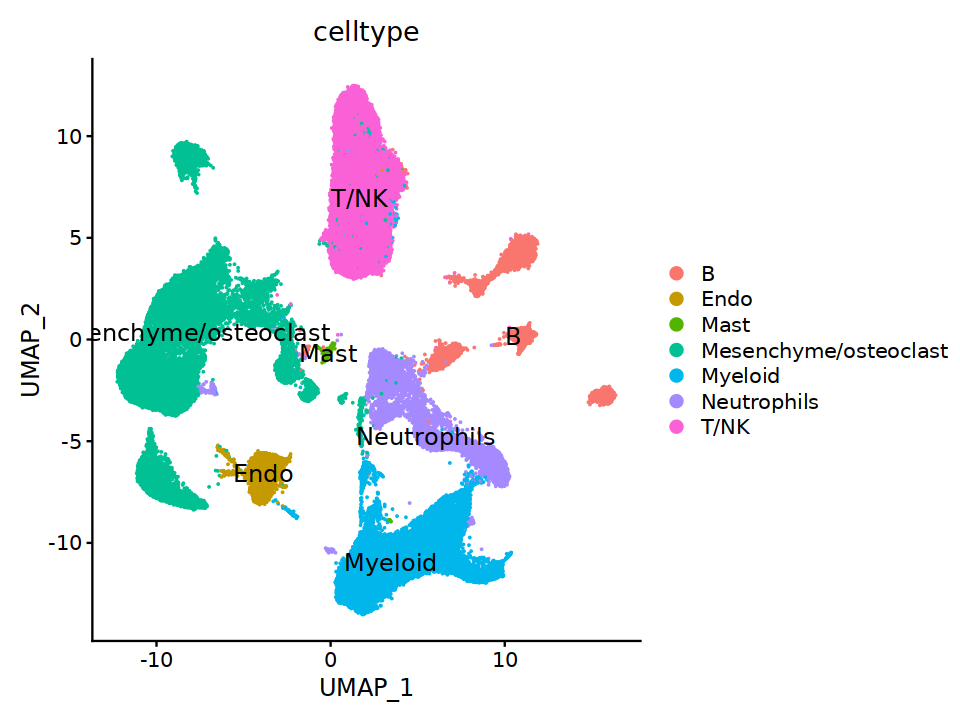

In [77]:
DimPlot(daa, group.by="celltype", label=T, label.size=5, reduction='umap')

In [78]:
table(daa$celltype)


                    B                  Endo                  Mast 
                 6364                  3952                   541 
Mesenchyme/osteoclast               Myeloid           Neutrophils 
                25631                 14538                  8241 
                 T/NK 
                28230 

In [79]:
OS = subset(daa,idents = 'Mesenchyme/osteoclast')

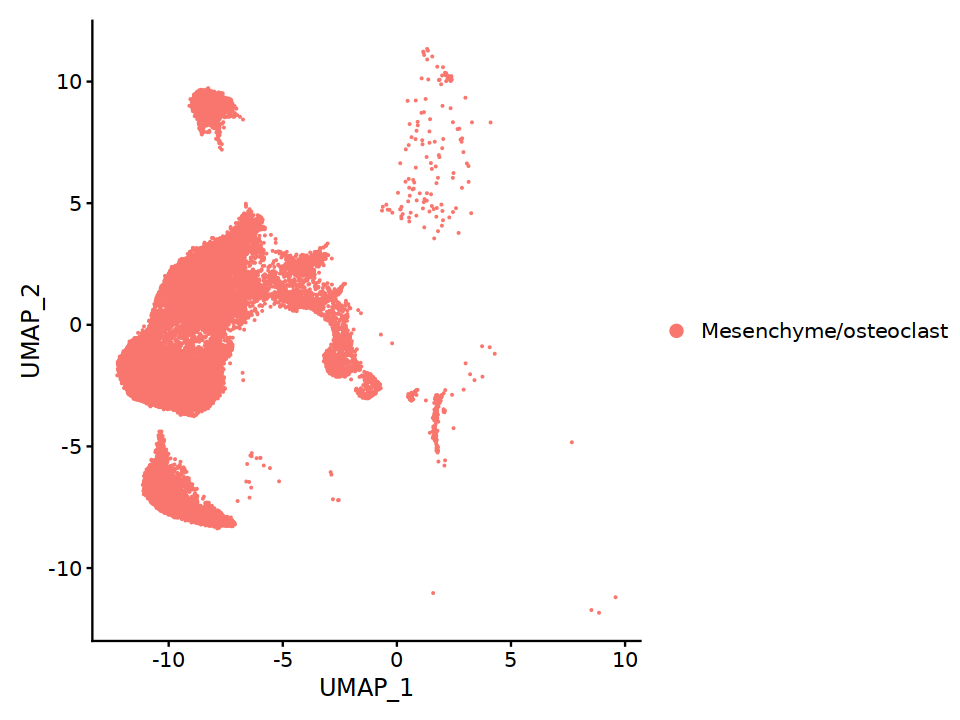

In [80]:
DimPlot(OS)

In [81]:
OS

An object of class Seurat 
38629 features across 25631 samples within 1 assay 
Active assay: RNA (38629 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [156]:
mca2=CreateSeuratObject(OS@assays$RNA@data,assay = "RNA",min.cells = 20,meta.data = OS@meta.data)
immune.combined = mca2
immune.combined

An object of class Seurat 
22452 features across 25631 samples within 1 assay 
Active assay: RNA (22452 features, 0 variable features)

In [157]:
library(harmony)
DefaultAssay(immune.combined) = 'RNA'
table(OS$orig.ident)
sceList <- SplitObject(immune.combined, split.by = "orig.ident")


          C1           C2           C3           C4           S1           S2 
         319          256           91         3080          428          786 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
         366          613         4249         2911         6683         4680 
WH2203005877 
        1169 

In [158]:
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])
DefaultAssay(single.ob) = 'RNA'
scRNA_harmony = single.ob
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:50)


scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:50)
##作图
#group_by_cluster
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:50) %>% FindClusters(resolution =  0.2)
options(repr.plot.width = 12,repr.plot.height = 8)
table(scRNA_harmony$group)
options(repr.plot.width = 8,repr.plot.height = 6)

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony converged after 9 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
 26.489   6.854  24.058 

07:34:49 UMAP embedding parameters a = 0.9922 b = 1.112

07:34:49 Read 25631 rows and found 50 numeric columns

07:34:49 Using Annoy for neighbor search, n_neighbors = 30

07:34:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:34:52 Writing NN index file to temp file /tmp/RtmpKLItms/filead58618dca17

07:34:52 Searching Annoy index using 1 thread, search_k = 3000

07:34:59 Annoy recall = 100%

07:35:00 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

07:35:02 Initializing from normalized Laplacian + noise (using irlba)

07:35:05 Commencing optimization for 200 epochs, with 1171506 positive edges

07:35:35 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25631
Number of edges: 1096215

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9717
Number of communities: 15
Elapsed time: 8 seconds



     OS control 
  19692    5939 

In [159]:
options(repr.plot.width = 8,repr.plot.height = 6)

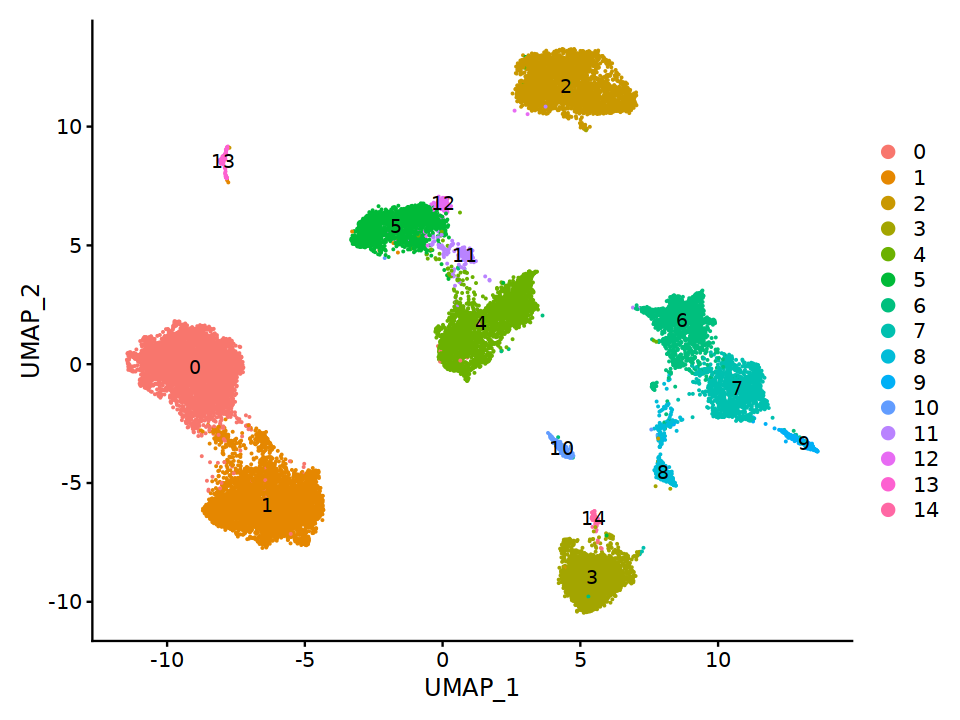

In [160]:
DimPlot(scRNA_harmony, reduction = "umap", label = T)

In [161]:
table(scRNA_harmony$group,scRNA_harmony$seurat_clusters)

         
             0    1    2    3    4    5    6    7    8    9   10   11   12   13
  OS      4923 4445 3025  278 2502 1513 1307  898  135   20  170  187  159  129
  control    5    3  334 2963  407  381  450  490  304  308  120   68   33    0
         
            14
  OS         1
  control   73

In [162]:
Idents(scRNA_harmony) = 'seurat_clusters'

In [88]:
#scRNA_harmony = subset(scRNA_harmony,idents = c(0,1,2,3,4,5,6,8))

In [163]:

DefaultAssay(scRNA_harmony) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 14



In [164]:
write.csv(sce.markers,file = 'OS.sce.markers.csv')

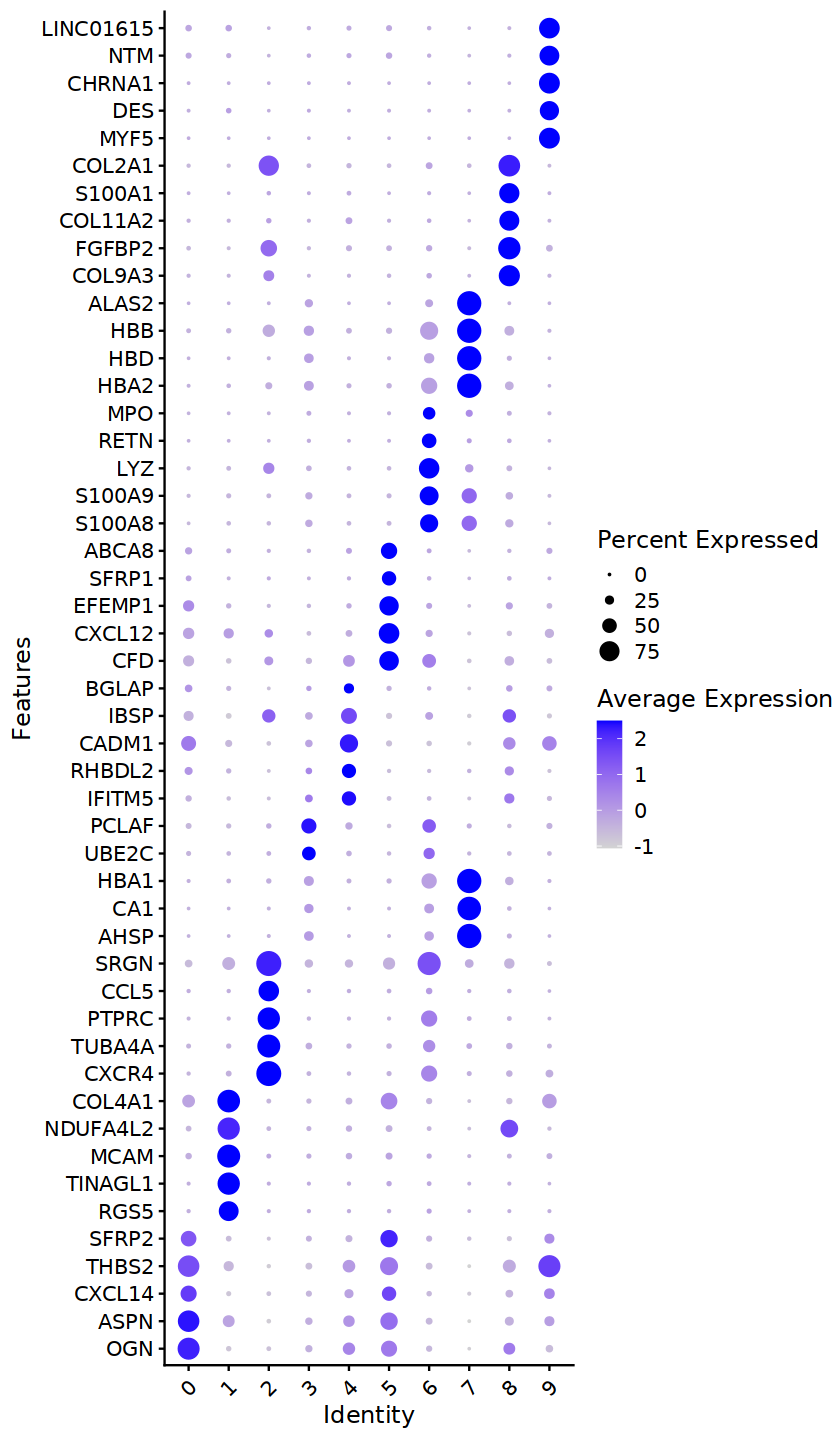

In [91]:
options(repr.plot.height = 12,repr.plot.width = 7)

 DotPlot(scRNA_harmony, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

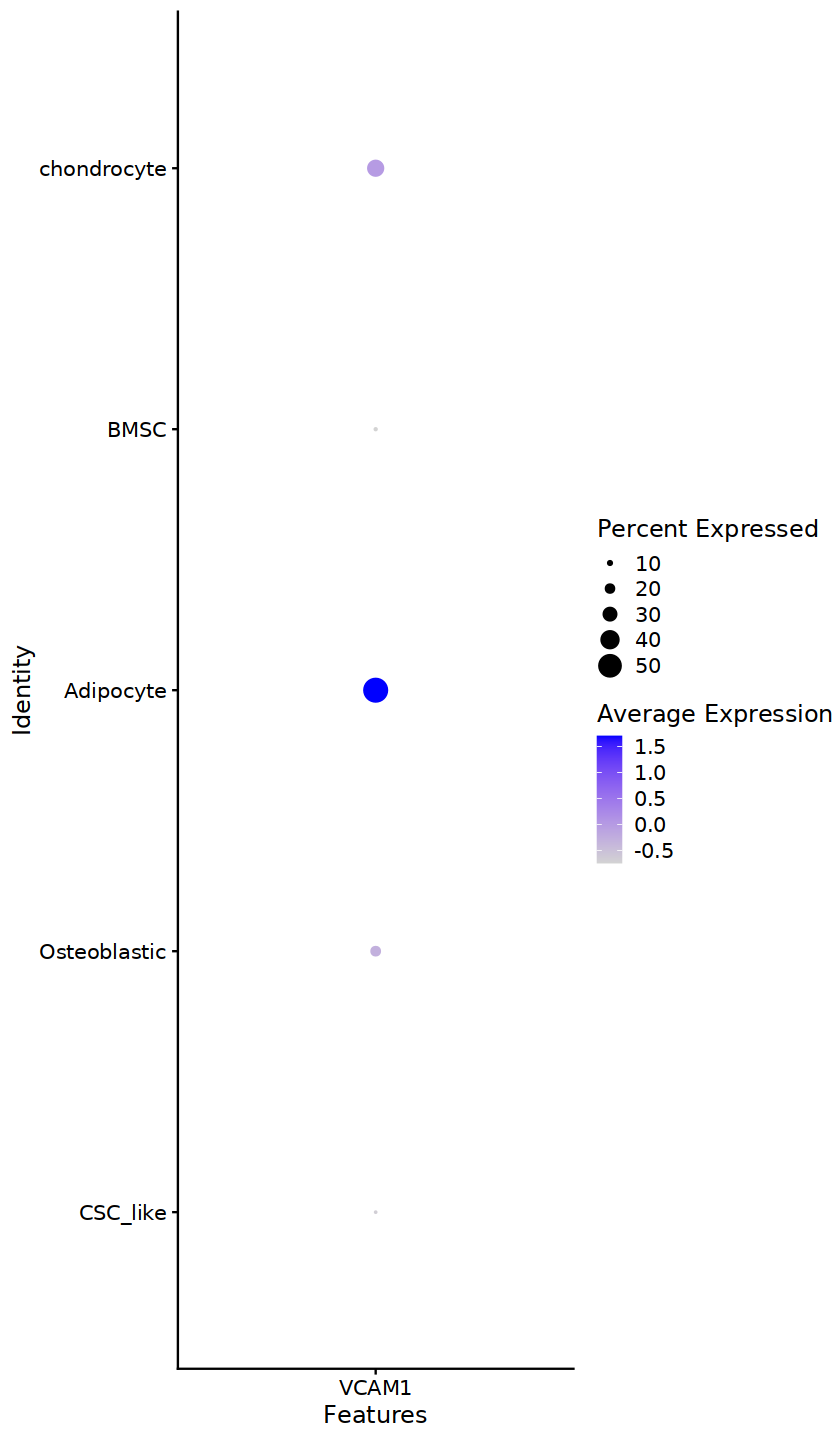

In [92]:
DotPlot(SCE,features = 'VCAM1')

In [167]:
Idents(scRNA_harmony) = 'seurat_clusters'
scRNA_harmony = subset(scRNA_harmony,idents =  c(0,1,2,4,5,7,9,10))

In [168]:
SCE = scRNA_harmony 

In [ ]:
# 2 4   OSteoblastic
#  10 chondrocyte
# 5 Adipocyte
# # # # 4 rpl|s high
#  7 9  BMSC
# # # # 9 profil 
# # # 3 CSC-like
# # 6 9  UNKONOW
# # # # 7 NEU
# # # # 8 NKT
# # 2 unknown
#  0 1 OSs
# 3 6 8 11 12 13 14unknown

In [226]:
Idents(SCE)  ='seurat_clusters'

celltype = data.frame(
    cluster =  c(0,1,2,4,5,7,9,10),
    celltype = c('OS1','OS2','MSCs',
                'OBs','Adipocyte','BMSC','BMSC'
                ,'chondrocyte')
)

for(i in 1:nrow(celltype)){
  SCE@meta.data[which(SCE@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [227]:
options(repr.plot.width = 12,repr.plot.height = 5)

In [228]:
Idents(SCE)  = 'celltype'

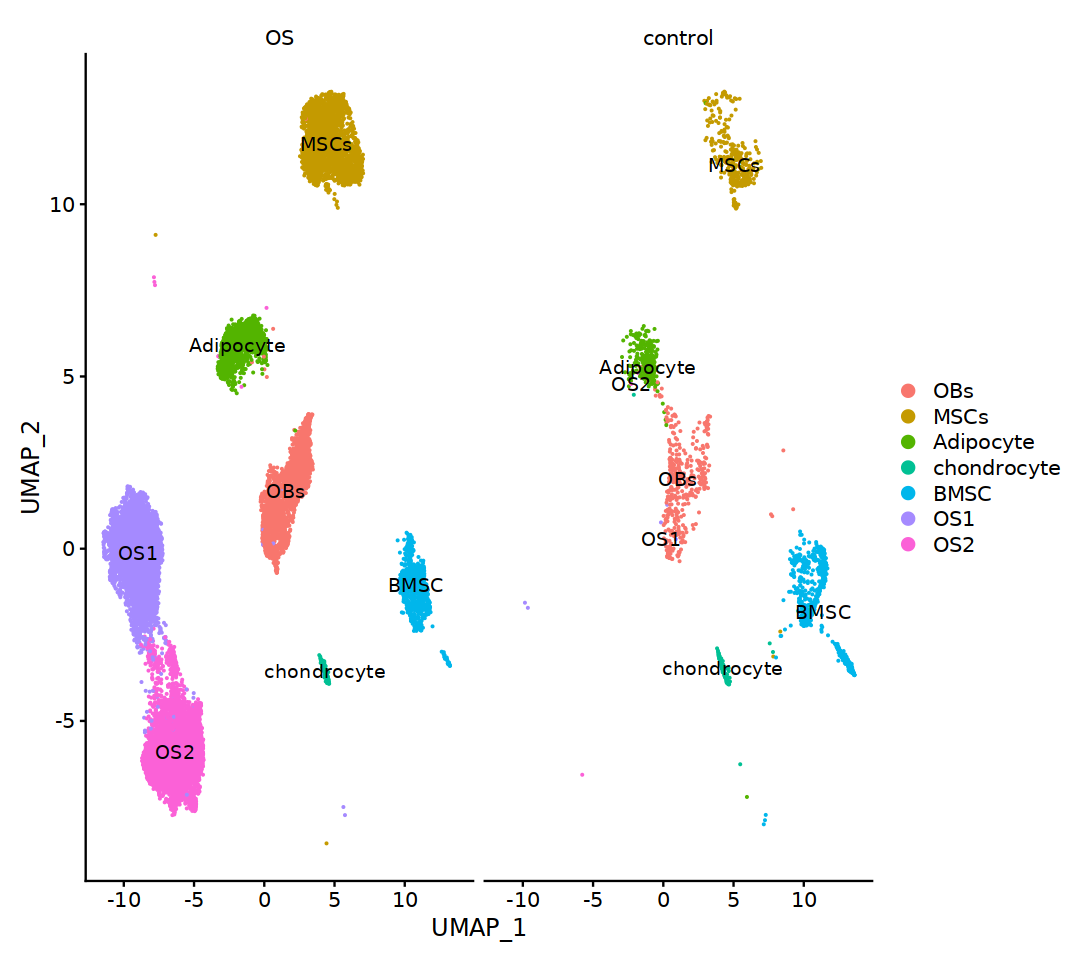

In [275]:
SCE1 = SCE
DimPlot(SCE1, reduction = "umap", label=T,split.by = 'group') 

In [230]:
saveRDS(SCE1,file = 'OS.final.rds')

In [231]:
SCE = readRDS('./OS.final.rds')

In [232]:
Idents(SCE) = 'celltype'
DefaultAssay(SCE) = 'RNA'
sce.markers <- FindAllMarkers(object = SCE, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

Calculating cluster OBs

Calculating cluster MSCs

Calculating cluster Adipocyte

Calculating cluster chondrocyte

Calculating cluster BMSC

Calculating cluster OS1

Calculating cluster OS2



In [233]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

In [234]:
library(ggplot2)

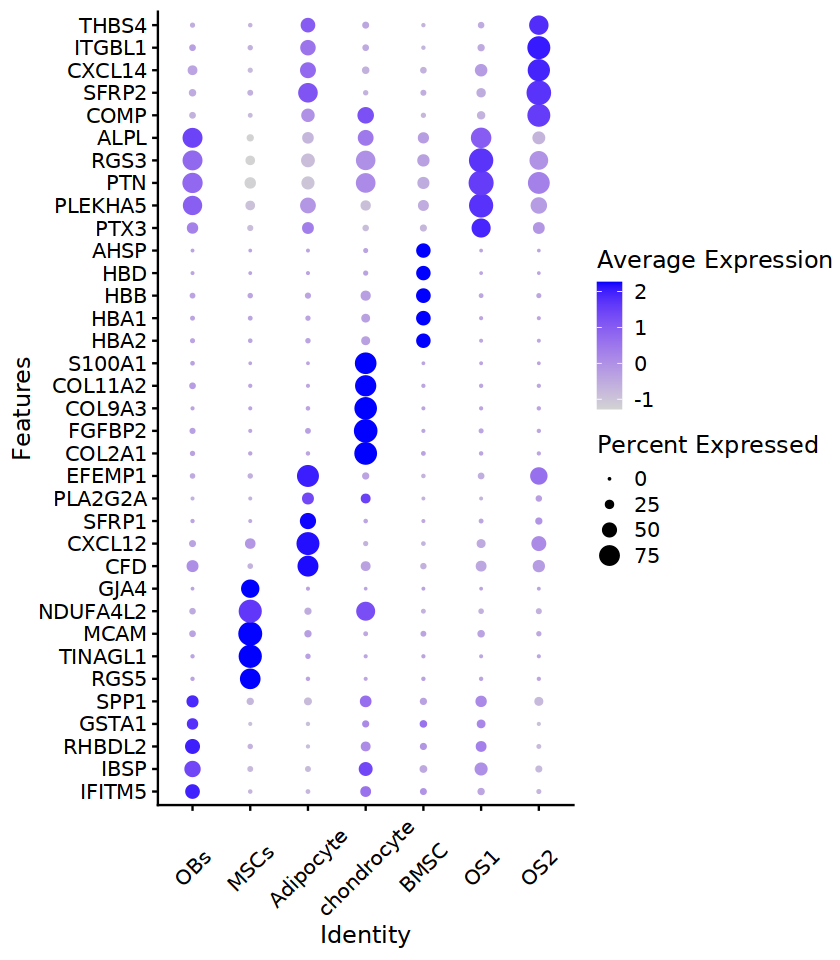

In [235]:
options(repr.plot.height = 8,repr.plot.width = 7)

 DotPlot(SCE, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [236]:
scedata = SCE

In [237]:
scedata$orig.ident = scedata$sample

In [238]:
library(Seurat)

In [239]:
Idents(scedata) = 'celltype'

In [240]:
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数


          C1           C2           C3           C4           S1           S2 
         238          195           58          191          236          507 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
         226          397         3514         2592         6392         3997 
WH2203005877 
        1001 


        OBs        MSCs   Adipocyte chondrocyte        BMSC         OS1 
 0.14884363  0.17186860  0.09690954  0.01483831  0.08780188  0.25214900 
        OS2 
 0.22758903 

             
                C1   C2   C3   C4   S1   S2   S3   S4 WH2109002886 WH2109013167
  OBs           83   51   12   48   18  102   63   30          781          641
  MSCs          75   85   15   26    6   53    4   70          218          210
  Adipocyte     73   51   30   86   21   69    5   46          366           69
  chondrocyte    2    4    1   30    2   36   27   18            0           22
  BMSC           2    4    0    0  189  244  127  232          356          186
  OS1            3    0    0    1    0    1    0    0          980         1078
  OS2            0    0    0    0    0    2    0    1          813          386
             
              WH2112008442 WH2201006389 WH2203005877
  OBs                  409          598           73
  MSCs                1327          740          530
  Adipocyte            539          453           86
  chondrocyte            7          141            0
  BMSC                  77          244           55
  OS1         

In [241]:
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- data.frame(Cellratio)

In [242]:
library(reshape2)
cellper <- dcast(Cellratio,Var2~Var1, value.var = "Freq")#长数据转为宽数据
rownames(cellper) <- cellper[,1]
cellper <- cellper[,-1]

In [243]:
sample <- rownames(cellper)

In [244]:
sample

[1] "C1"           "C2"           "C3"           "C4"           "S1"          
 [6] "S2"           "S3"           "S4"           "WH2109002886" "WH2109013167"
[11] "WH2112008442" "WH2201006389" "WH2203005877"

In [245]:
scRNA = scedata

In [246]:
group <- c(rep('Con',8),rep('OS',5))


samples <- data.frame(sample, group)#创建数据框

rownames(samples)=samples$sample
cellper$sample <- samples[rownames(cellper),'sample']#R添加列
cellper$group <- samples[rownames(cellper),'group']#R添加列

###作图展示
pplist = list()
sce_groups = unique(scRNA$celltype)

In [247]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(cowplot)
for(group_ in sce_groups){
  cellper_  = cellper %>% select(one_of(c('sample','group',group_)))#选择一组数据
  colnames(cellper_) = c('sample','group','percent')#对选择数据列命名
  cellper_$percent = as.numeric(cellper_$percent)#数值型数据
  cellper_ <- cellper_ %>% group_by(group) %>% mutate(upper =  quantile(percent, 0.75), 
                                                      lower = quantile(percent, 0.25),
                                                      mean = mean(percent),
                                                      median = median(percent))#上下分位数
# print(group_)
print(cellper_$median)
      pp1 = ggplot(cellper_,aes(x=group,y=percent)) + #ggplot作图
    geom_jitter(shape = 21,aes(fill=group),width = 0.25) + 
    stat_summary(fun=mean, geom="point", color="grey60") +
    theme_cowplot() +
    theme(axis.text = element_text(size = 10),axis.title = element_text(size = 10),legend.text = element_text(size = 10),
          legend.title = element_text(size = 10),plot.title = element_text(size = 10,face = 'plain'),legend.position = 'none') + 
    labs(title = group_,y='Percentage') +
    geom_errorbar(aes(ymin = lower, ymax = upper),col = "grey60",width =  1)
  
  ###组间t检验分析
  labely = max(cellper_$percent)
  compare_means(percent ~ group,  data = cellper_)
  my_comparisons <- list( c("Con", "OS") )
  pp1 = pp1 + stat_compare_means(comparisons = my_comparisons,size = 3,method = "t.test")
  pplist[[group_]] = pp1
}
  

 [1] 0.2291027 0.2291027 0.2291027 0.2291027 0.2291027 0.2291027 0.2291027
 [8] 0.2291027 0.1496122 0.1496122 0.1496122 0.1496122 0.1496122
 [1] 0.1562240 0.1562240 0.1562240 0.1562240 0.1562240 0.1562240 0.1562240
 [8] 0.1562240 0.1851389 0.1851389 0.1851389 0.1851389 0.1851389
 [1] 0.19881657 0.19881657 0.19881657 0.19881657 0.19881657 0.19881657
 [7] 0.19881657 0.19881657 0.08591409 0.08591409 0.08591409 0.08591409
[13] 0.08591409
 [1] 0.032926435 0.032926435 0.032926435 0.032926435 0.032926435 0.032926435
 [7] 0.032926435 0.032926435 0.001095119 0.001095119 0.001095119 0.001095119
[13] 0.001095119
 [1] 0.25088757 0.25088757 0.25088757 0.25088757 0.25088757 0.25088757
 [7] 0.25088757 0.25088757 0.06104578 0.06104578 0.06104578 0.06104578
[13] 0.06104578
 [1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [8] 0.0000000 0.2788845 0.2788845 0.2788845 0.2788845 0.2788845
 [1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [8] 0.0000000 0.2

In [248]:
options(repr.plot.height = 8,repr.plot.width = 9)

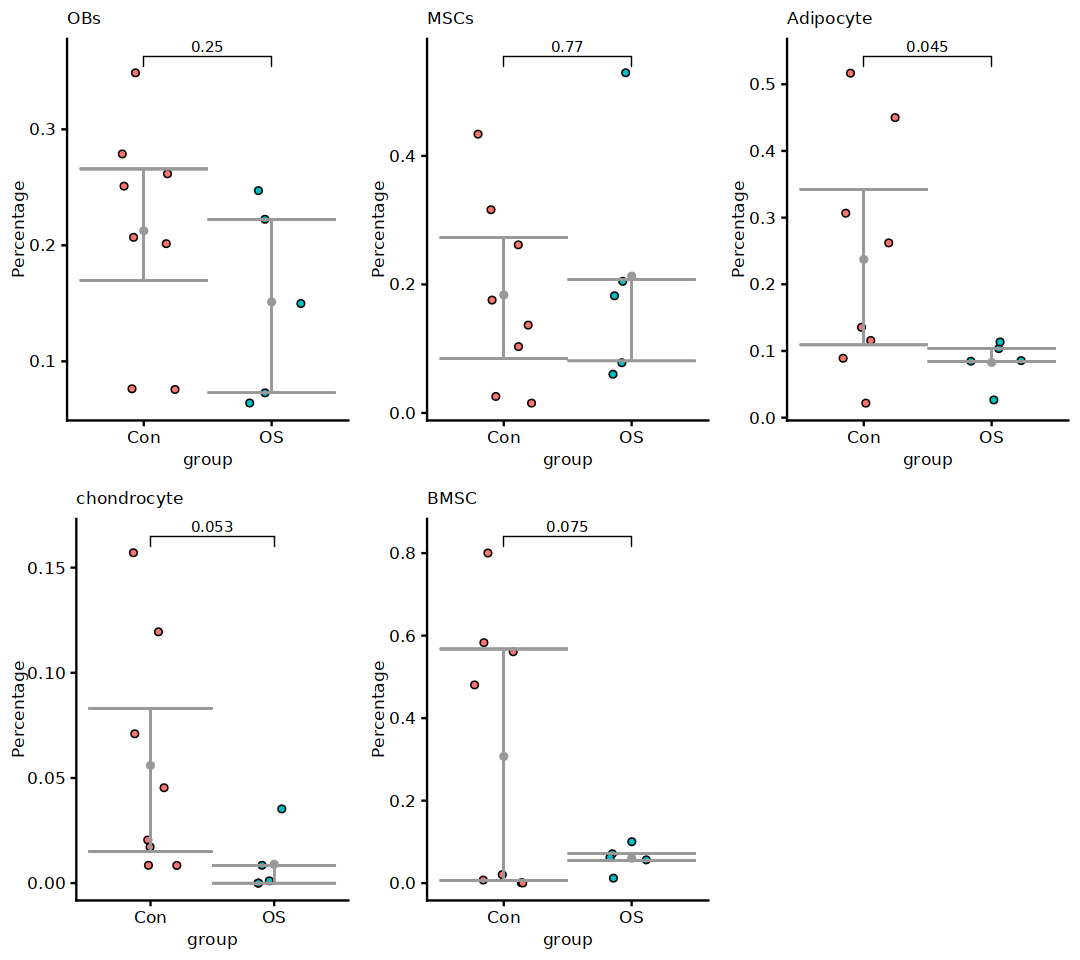

In [249]:
 library(cowplot)
plot_grid(pplist[[1]],
          pplist[[2]],
          pplist[[3]],
          pplist[[4]],
          pplist[[5]])

In [250]:
scRNA = scedata


          C1           C2           C3           C4           S1           S2 
         238          195           58          191          236          507 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
         226          397         3514         2592         6392         3997 
WH2203005877 
        1001 


        OBs        MSCs   Adipocyte chondrocyte        BMSC         OS1 
 0.14884363  0.17186860  0.09690954  0.01483831  0.08780188  0.25214900 
        OS2 
 0.22758903 

             
                OS control
  OBs         2502     407
  MSCs        3025     334
  Adipocyte   1513     381
  chondrocyte  170     120
  BMSC         918     798
  OS1         4923       5
  OS2         4445       3

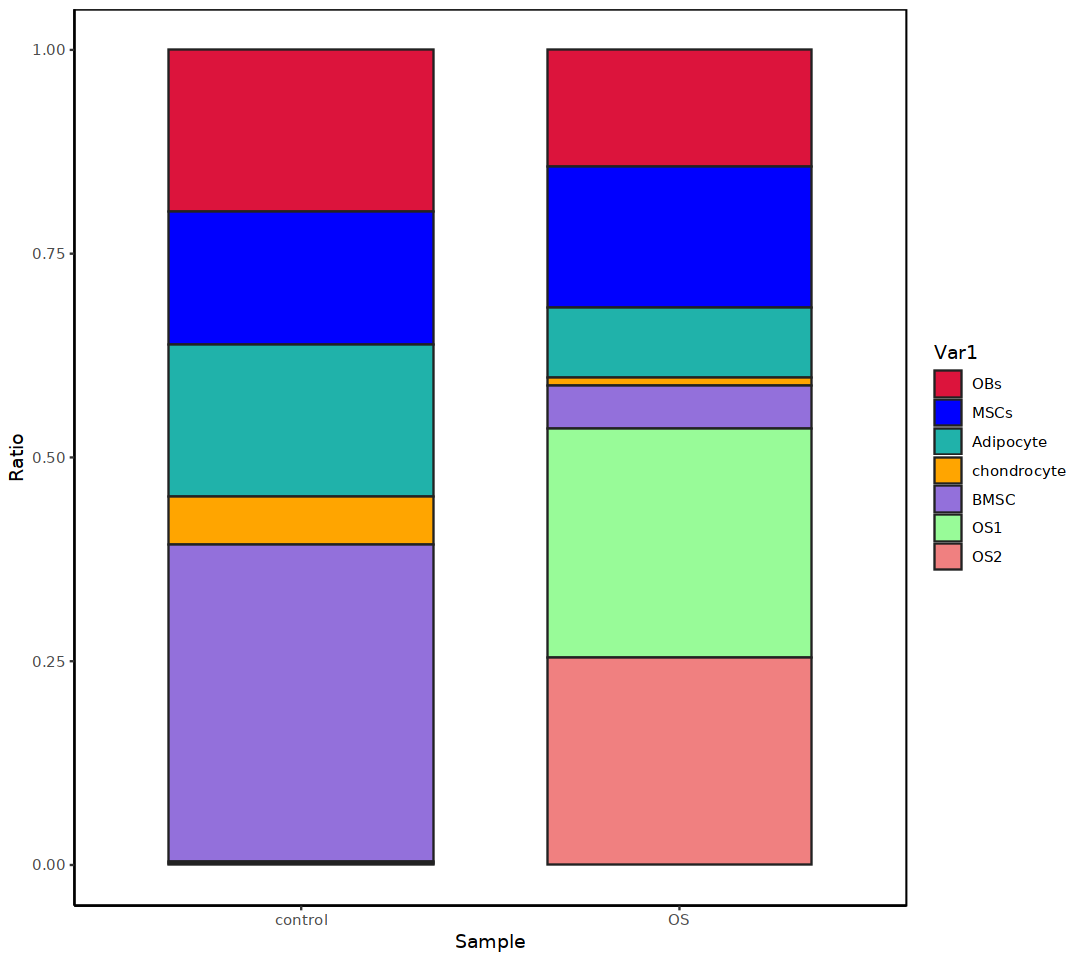

In [251]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('control','OS'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

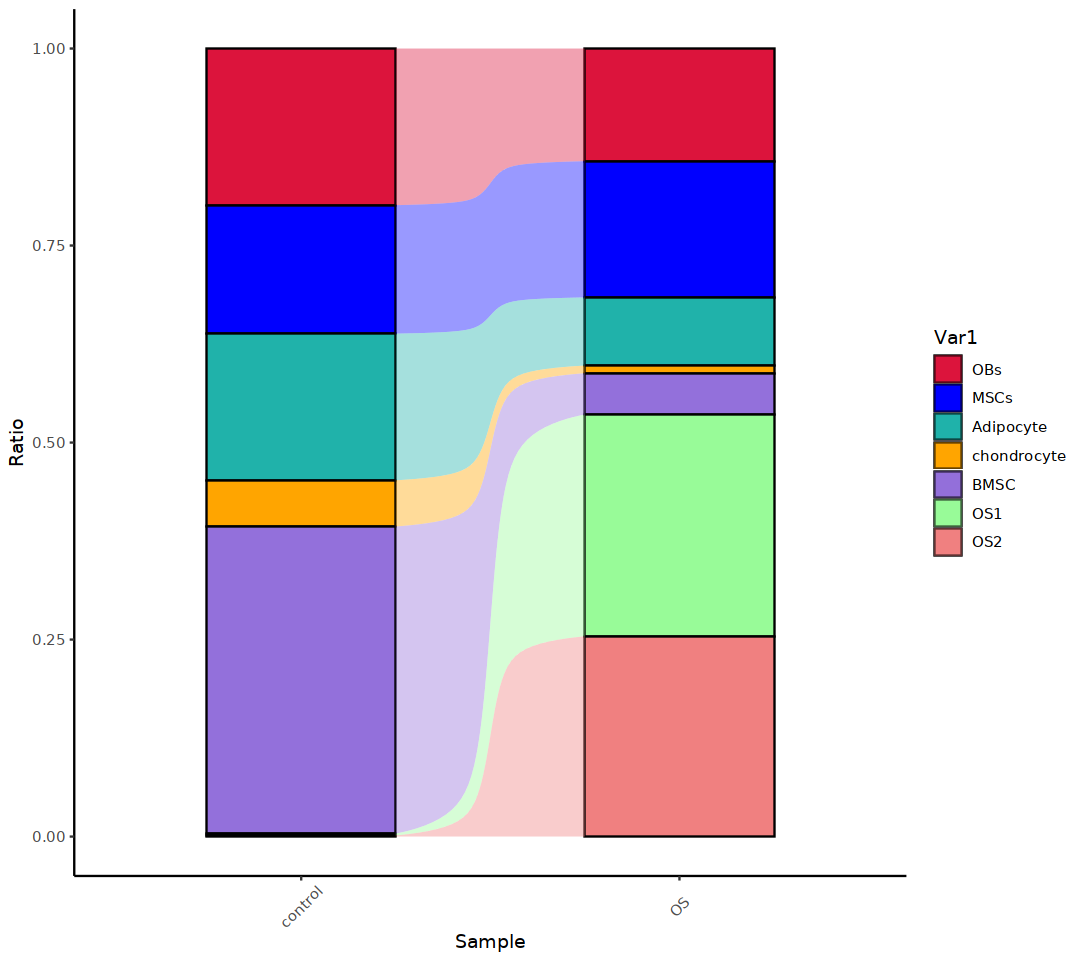

In [252]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [253]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)

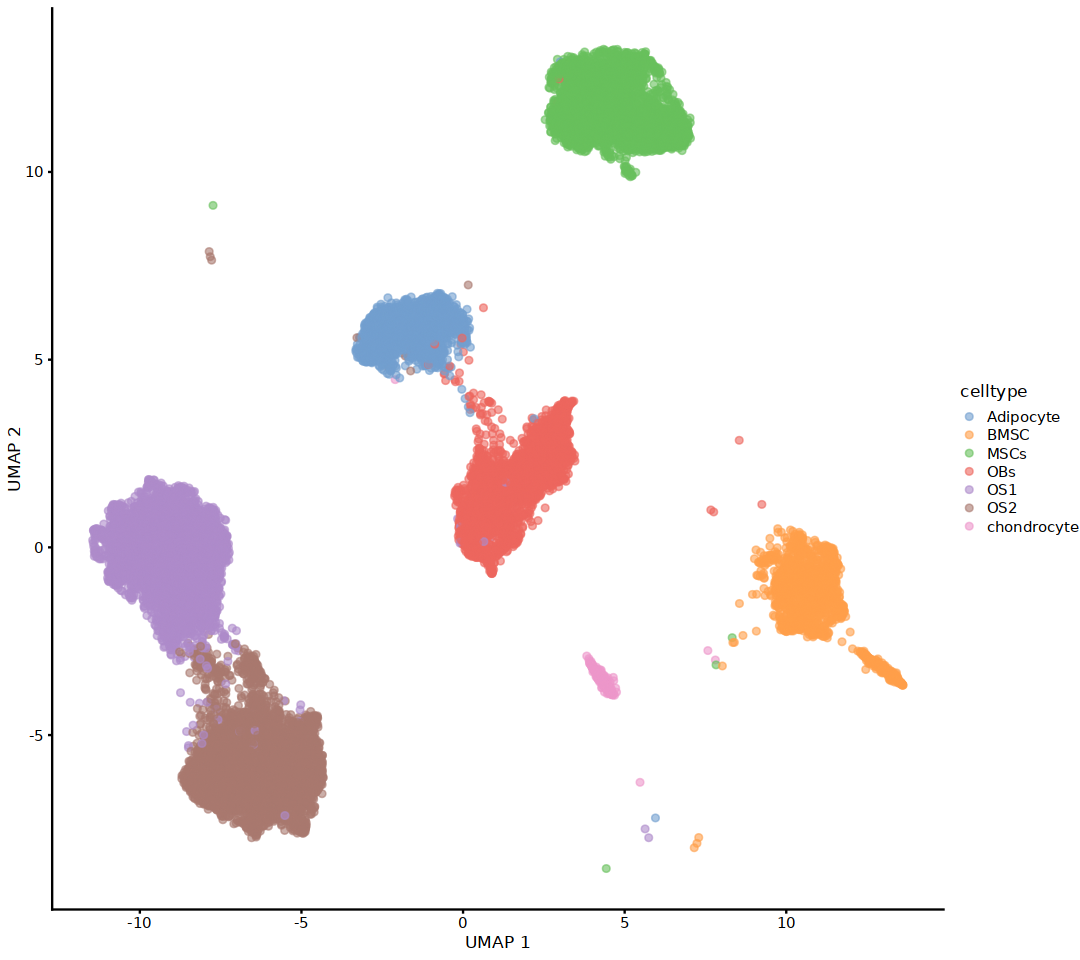

In [254]:
sce <- as.SingleCellExperiment(scedata)
 
#Visualize the data
plotReducedDim(sce, colour_by="celltype", dimred = "UMAP") 

Constructing kNN graph with k:20

Checking valid object

Running refined sampling with reduced_dim

Checking meta.data validity

Counting cells in neighbourhoods

  [[ suppressing 13 column names 'C1', 'C2', 'C3' ... ]]



6 x 13 sparse Matrix of class "dgCMatrix"
                                
1 12 17 6 6 . . . . .  .  .  . .
2  .  . . . . . . . 1  7 61  . .
3  .  . . . . . . . . 56  .  . .
4  .  . . . . . . . .  .  . 59 .
5  .  . . . . . . . .  .  . 33 .
6  .  . . . . . . . 1  .  . 36 .

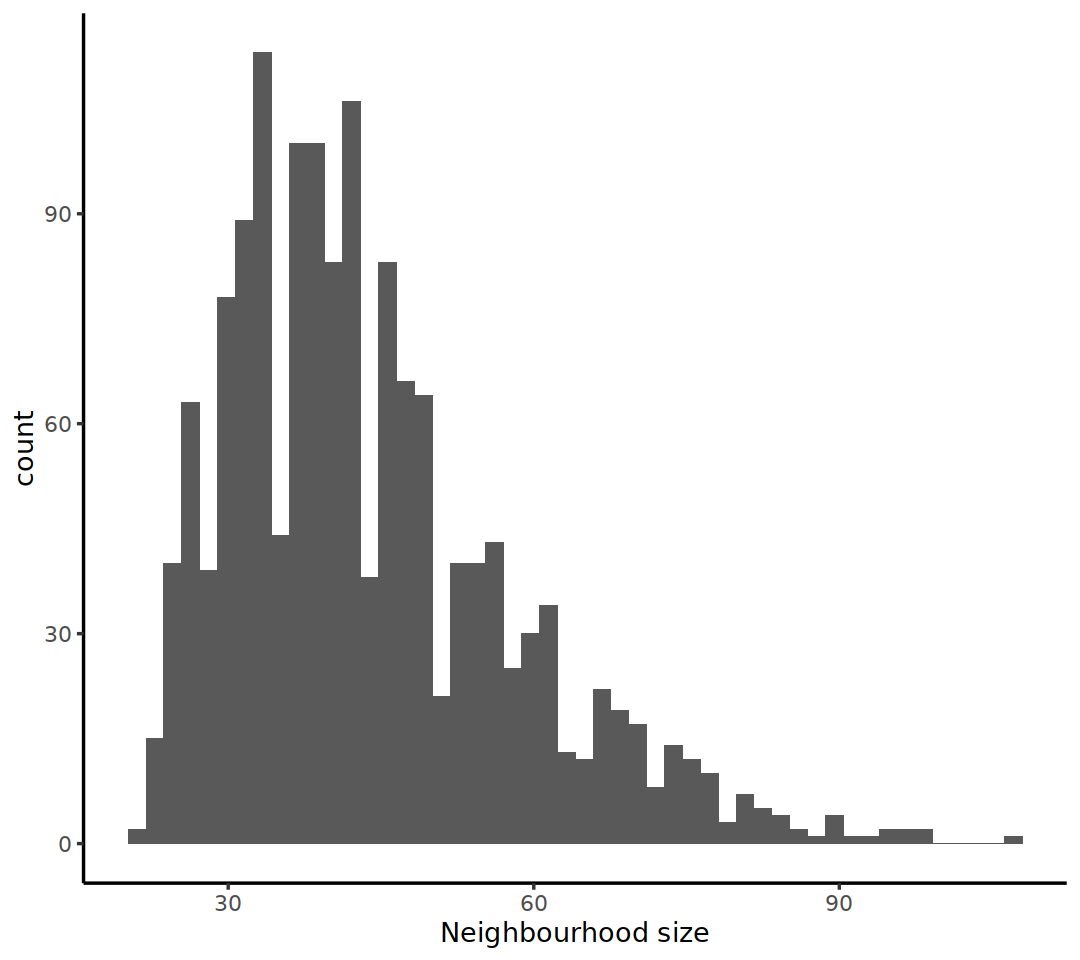

In [255]:
scmilo <- Milo(sce)
 
#Construct KNN graph
scmilo <- buildGraph(scmilo, k = 20, d = 20,reduced.dim = "PCA")
 
#Defining representative neighbourhoods on the KNN graph
set.seed(10)
scmilo <- makeNhoods(scmilo, prop = 0.1,
                     k = 20, d = 20, 
                     refined = TRUE, reduced_dims = "PCA")
plotNhoodSizeHist(scmilo)
 
#Counting cells in neighbourhoods
scmilo <- countCells(scmilo, 
                     meta.data = as.data.frame(colData(scmilo)), 
                     sample = "sample")
head(nhoodCounts(scmilo))

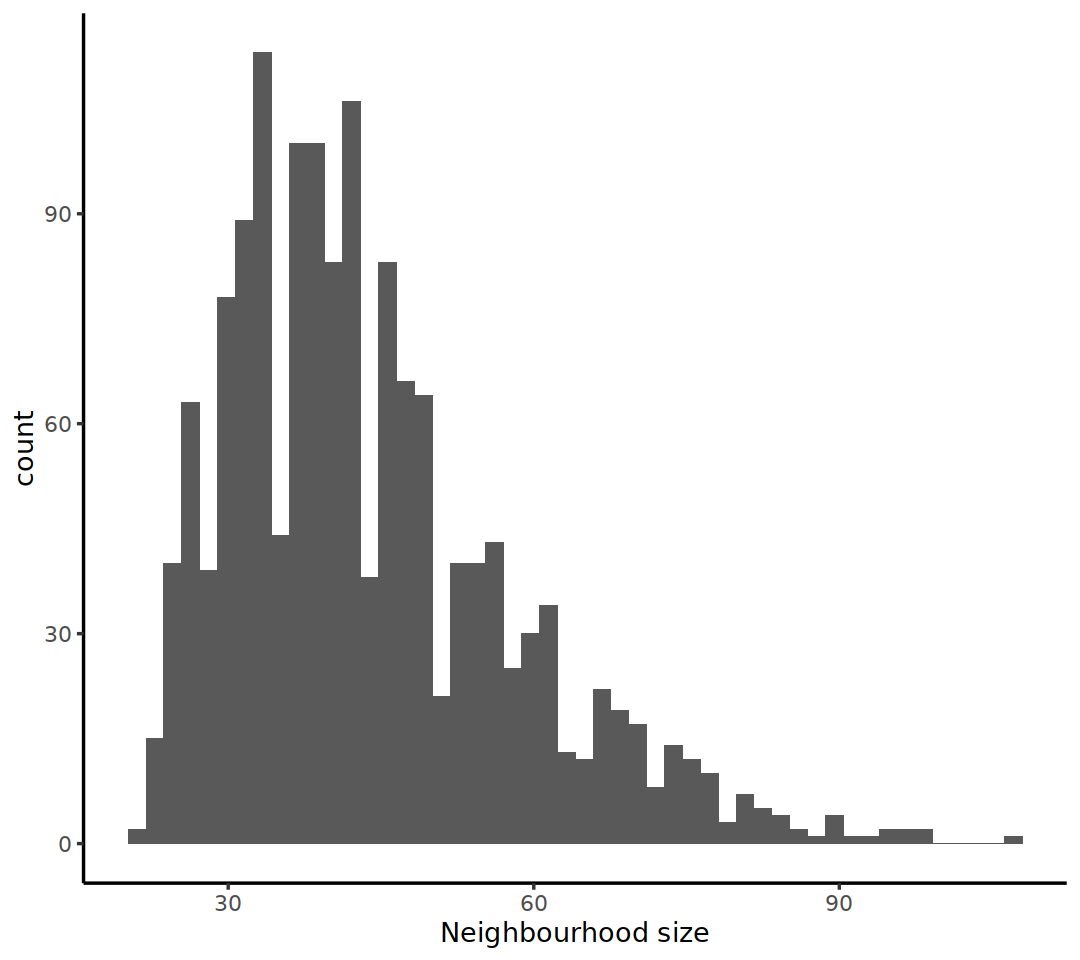

In [256]:
plotNhoodSizeHist(scmilo)

In [257]:
sc_design <- data.frame(colData(scmilo))[,c("sample", "group")]

In [258]:
sc_design <- distinct(sc_design)
rownames(sc_design) <- sc_design$sample

In [259]:
sc_design <- sc_design[colnames(nhoodCounts(scmilo)), , drop=FALSE]
table(sc_design$group)


     OS control 
      5       8 

In [260]:

#odDistance(scmilo, d = 20, reduced.dim = "PCA")

In [261]:
rownames(sc_design) <- sc_design$sample

In [262]:
sc_design$control = c(rep(1,4),rep(0,5),rep(1,4))
sc_design$OS = c(rep(0,4),rep(1,5),rep(0,4))

In [263]:
sc_design$control  = as.factor(sc_design$control )

In [264]:
sc_design$OS = as.factor(sc_design$OS )

In [265]:
model <- model.matrix(~ 0+group, data=sc_design)

In [266]:
model

,groupOS,groupcontrol
C1,0,1
C2,0,1
C3,0,1
C4,0,1
S1,0,1
S2,0,1
S3,0,1
S4,0,1
WH2109002886,1,0
WH2109013167,1,0


In [267]:
contrast.1 <- c("groupOS - groupcontrol") # the syntax is <VariableName><ConditionLevel> - <VariableName><ControlLevel>

# we need to use the ~ 0 + Variable expression here so that we have all of the levels of our variable as separate columns in our model matrix
results <- testNhoods(scmilo, design = ~0 + group, design.df = sc_design, model.contrasts = contrast.1,
                         fdr.weighting="graph-overlap", norm.method="TMM")
table(results$SpatialFDR < 0.1)

Using TMM normalisation

Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Performing spatial FDR correction withgraph-overlap weighting




FALSE  TRUE 
   12  1506 

In [268]:
results %>%
  arrange(SpatialFDR) %>%
  head() 

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-10.406362,14.10776,6.466047,0.01100443,0.02339891,1,0.02475037
2,7.018619,10.52394,5.939380,0.01481660,0.02339891,2,0.02475037
3,7.956753,11.26675,5.342352,0.02082549,0.02339891,3,0.02475037
4,7.547209,10.93357,5.448210,0.01960018,0.02339891,4,0.02475037
5,6.716697,10.30059,6.239367,0.01250365,0.02339891,5,0.02475037
6,6.905933,10.43785,6.045199,0.01395423,0.02339891,6,0.02475037


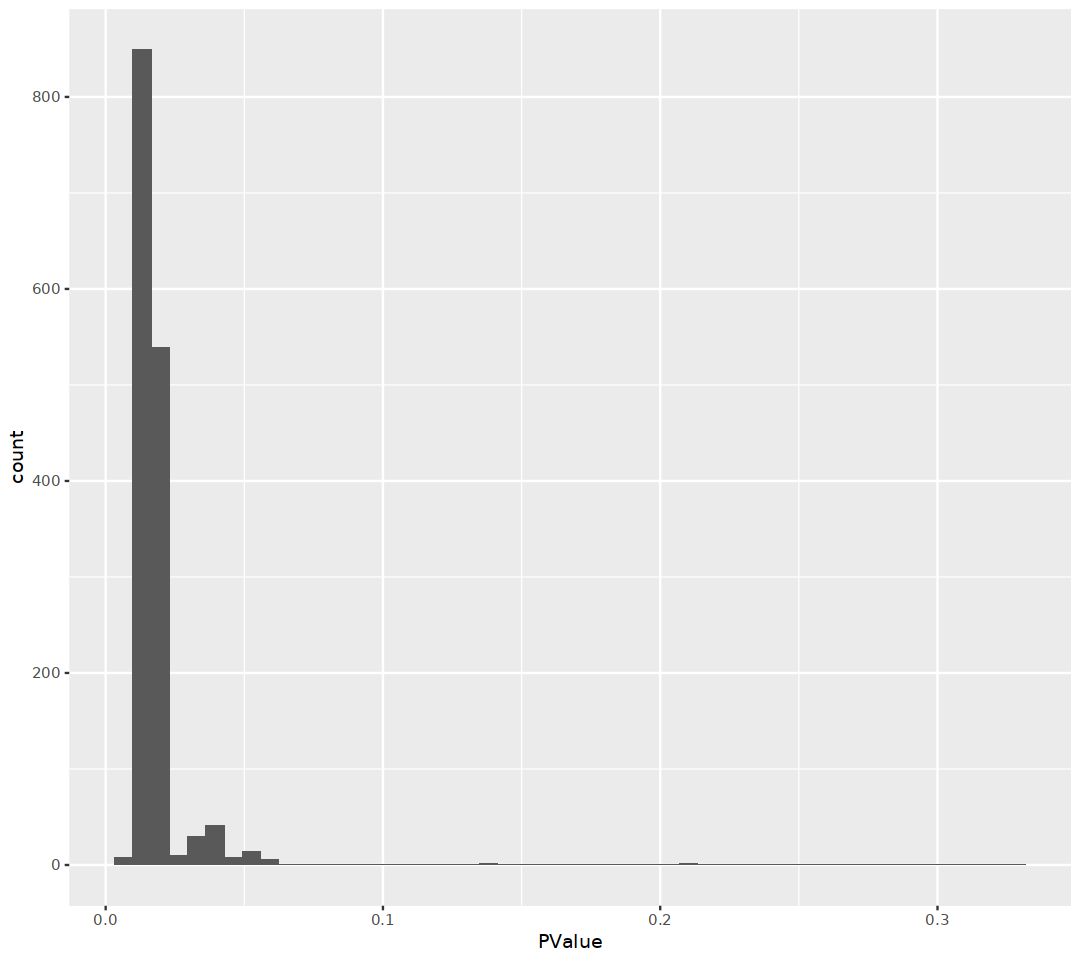

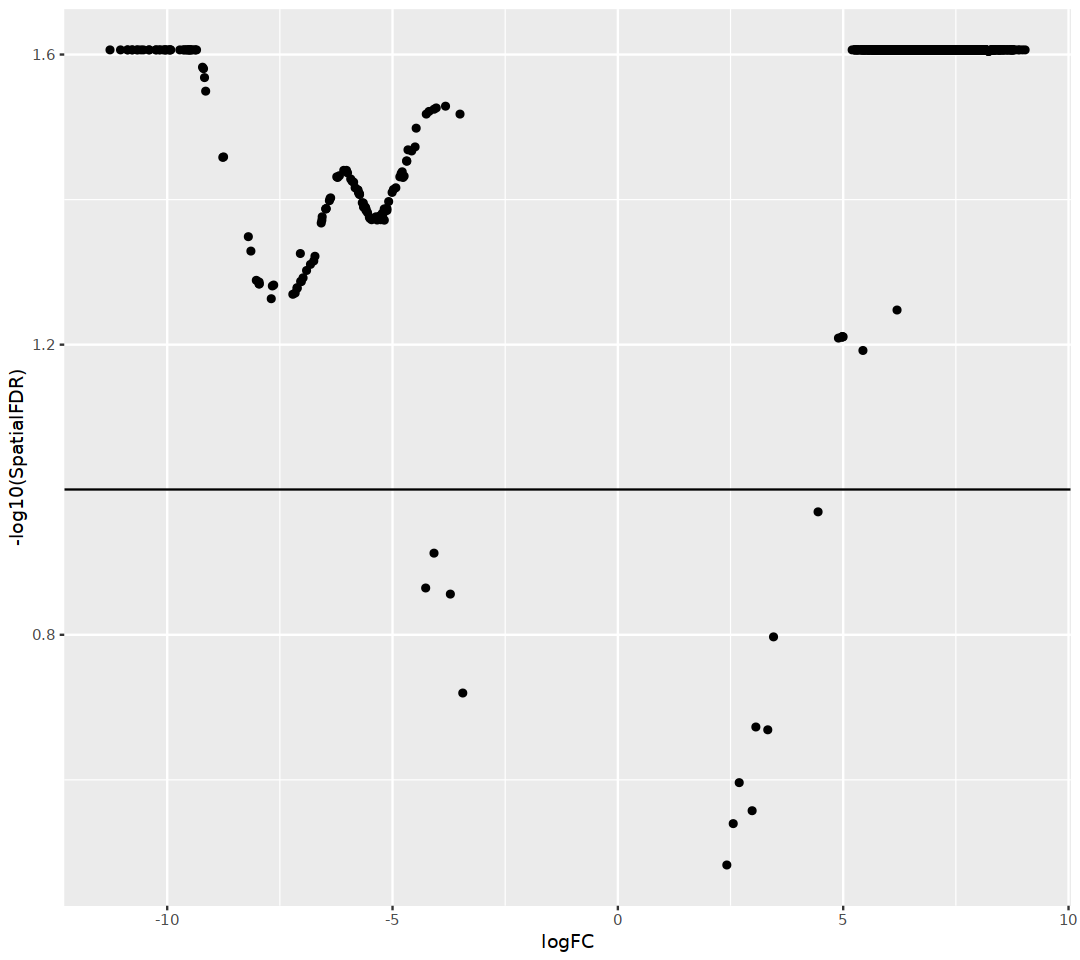

In [269]:
ggplot(results, aes(PValue)) + geom_histogram(bins=50)
ggplot(results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) 

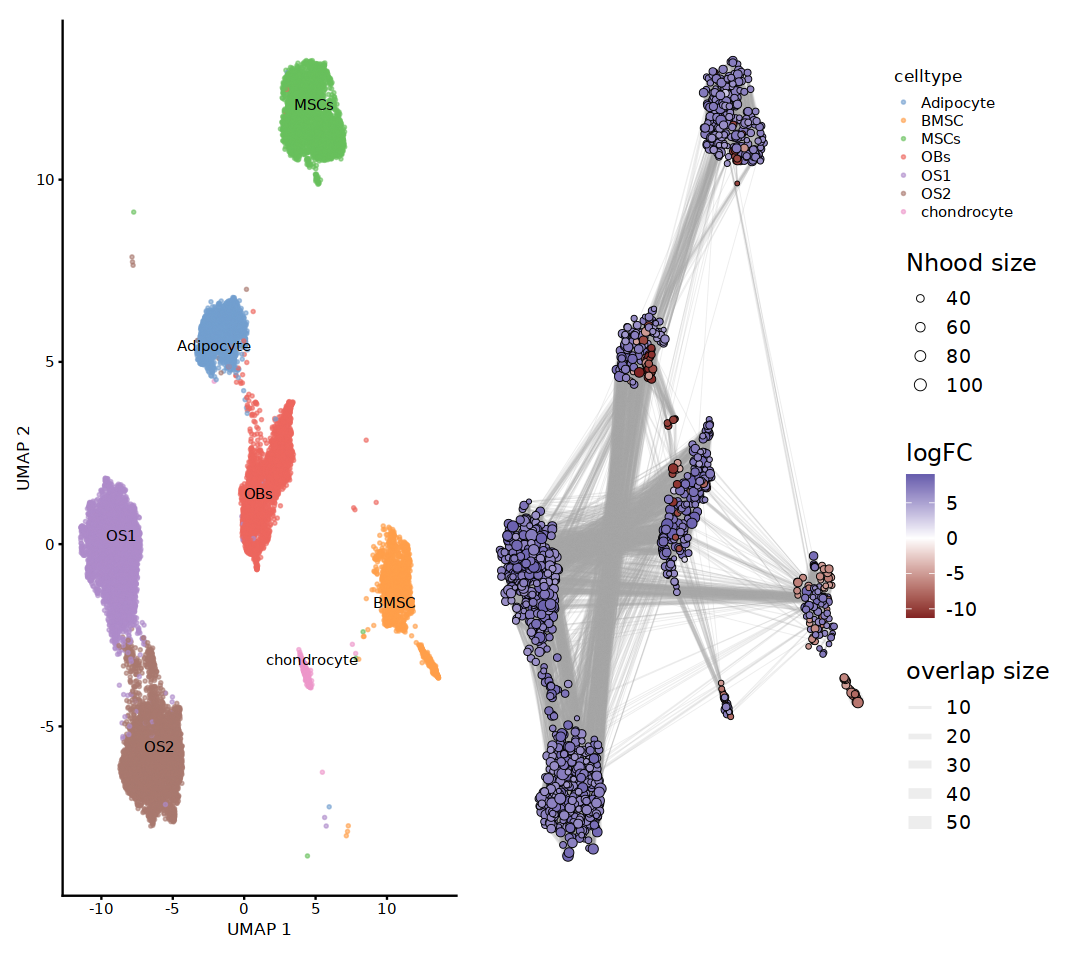

In [270]:
scmilo <- buildNhoodGraph(scmilo)
 
## Plot single-cell UMAP
umap_pl <- plotReducedDim(scmilo, dimred = "UMAP", 
                          colour_by="celltype", text_by = "celltype", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")
 
## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(scmilo, results, layout="UMAP",alpha = 1) 
 
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [271]:
results <- annotateNhoods(scmilo, results, coldata_col = "celltype")

Converting celltype to factor...



In [272]:
table(results$celltype)


  Adipocyte        BMSC        MSCs         OBs         OS1         OS2 
        143         132         266         200         392         365 
chondrocyte 
         20 

In [273]:
# https://rdrr.io/github/MarioniLab/miloR/f/vignettes/milo_contrasts.Rmd

Converting group.by to factor...



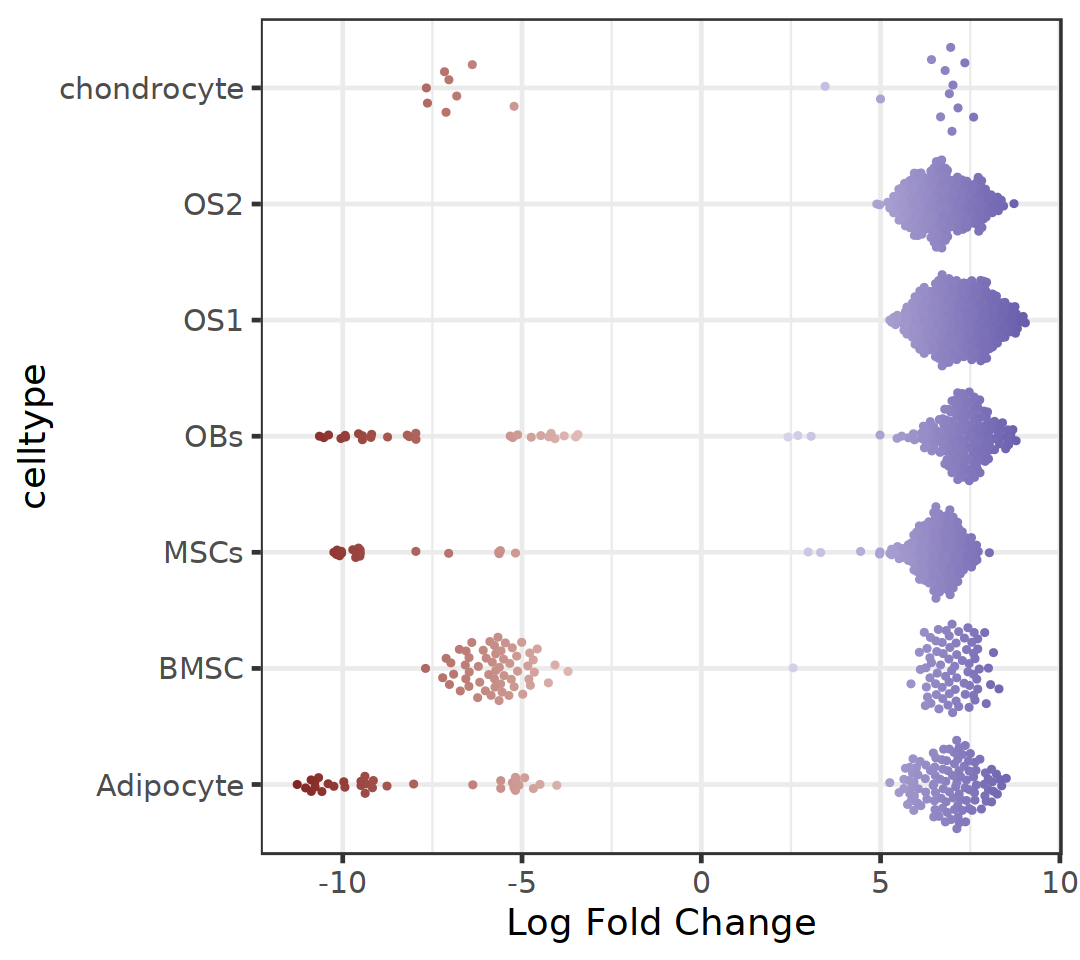

In [274]:
plotDAbeeswarm(results, group.by = "celltype",alpha = 1)